# Load Data


# Read and Preprocessing

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
df_1 = pd.read_csv('D:\Pain\python\mlmed2025\mitbih_train.csv',header=None)
df_2 = pd.read_csv('D:\Pain\python\mlmed2025\mitbih_test.csv',header=None)
df = pd.concat([df_1,df_2],axis=0)
print(df[187].unique())
print(df.head())

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10100\1228824517.py:1: SyntaxWarning: invalid escape sequence '\P'
  df_1 = pd.read_csv('D:\Pain\python\mlmed2025\mitbih_train.csv',header=None)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10100\1228824517.py:2: SyntaxWarning: invalid escape sequence '\P'
  df_2 = pd.read_csv('D:\Pain\python\mlmed2025\mitbih_test.csv',header=None)


[0. 1. 2. 3. 4.]
        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0

- 0: N
- 1: S
- 2: V
- 3: F
- 4: Q

dominat one is 0

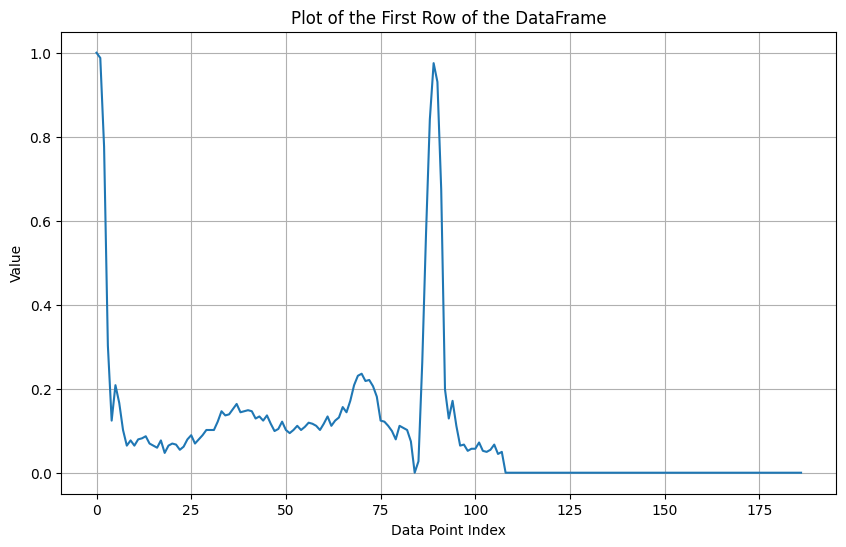

In [5]:
row_to_plot = df.iloc[1000, :-1]

plt.figure(figsize=(10, 6))
plt.plot(row_to_plot)
plt.xlabel("Data Point Index")
plt.ylabel("Value")
plt.title("Plot of the First Row of the DataFrame")
plt.grid(True)
plt.show()


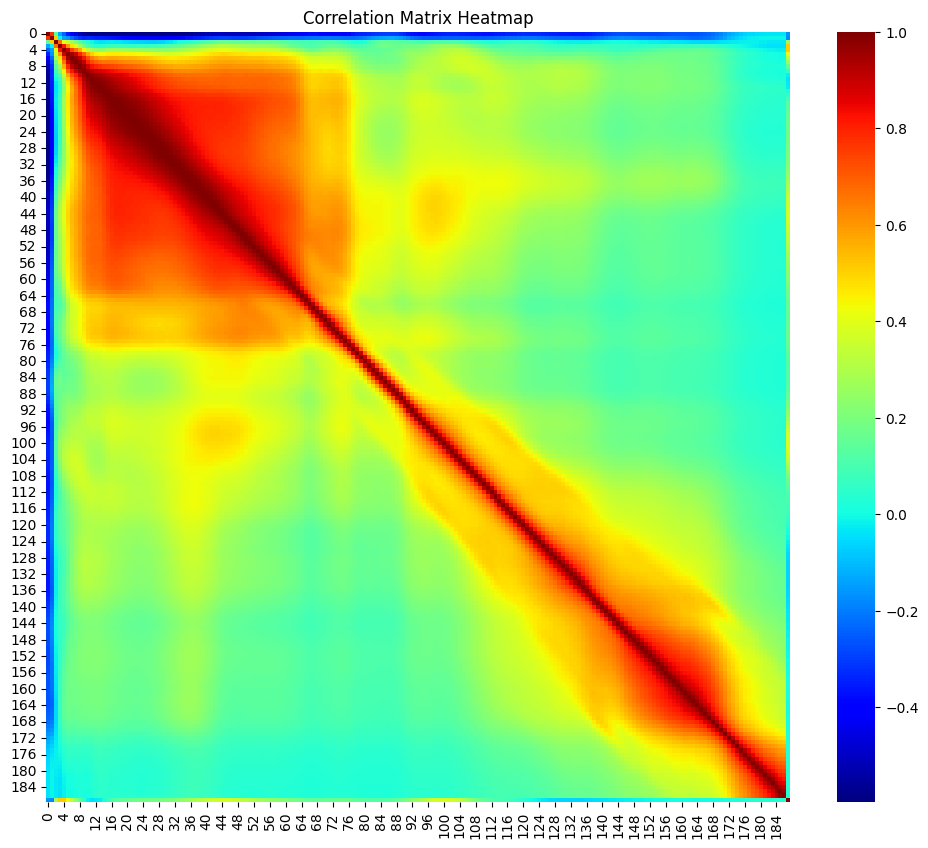

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='jet', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [7]:
X = df.drop(187, axis=1)
y = df[187]

nan_mask = y.isna()
X = X[~nan_mask]
y = y[~nan_mask]



rf_feature_selector = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_feature_selector.fit(X, y)
feature_importances = rf_feature_selector.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_20_features = feature_importance_df['Feature'][:20].tolist()
X_selected = X[top_20_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Train

Using Random forest

In [8]:
rf = RandomForestClassifier(random_state=42)

In [9]:
param_grid = {
       'n_estimators': [100, 200],
       'max_depth': [5, 10],
       'min_samples_split': [2, 5],
       'min_samples_leaf': [1, 2],
   }

In [10]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_grid = grid_search.best_estimator_
best_params_grid = grid_search.best_params_
print("Best parameters (Grid Search):", best_params_grid)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters (Grid Search): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [11]:
y_pred = best_rf_grid.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.959890360895386
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     18160
         1.0       0.99      0.51      0.67       535
         2.0       0.98      0.78      0.87      1402
         3.0       0.85      0.11      0.19       158
         4.0       1.00      0.91      0.95      1635

    accuracy                           0.96     21890
   macro avg       0.95      0.66      0.73     21890
weighted avg       0.96      0.96      0.95     21890



In [13]:
y_train_pred = best_rf_grid.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {accuracy}")

if abs(train_accuracy - accuracy) > 0.1 :
    print("Warning: Potential overfitting detected.")

Training Accuracy: 0.9630979030563297
Test Accuracy: 0.959890360895386
